# HandWritten Recognizing

In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class


In [1]:
#Importing the library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#importing the dataset
dataset=tf.keras.datasets.mnist
(train_x,train_label),(test_x,test_label)=dataset.load_data()

In [11]:
#Data details
print("Details of datasets")
print("Train size : ",len(train_x))
print("Train label : ",len(train_label))
print("Test size : ",len(test_x))
print("Test label : ",len(test_label))

Details of datasets
Train size :  60000
Train label :  60000
Test size :  10000
Test label :  10000


In [12]:
#Normalize dataset
train_x=train_x/255.0
test_x=test_x/255.0

Label  5


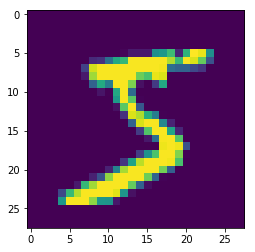

In [16]:
#Plotting label i
i=0
plt.imshow(train_x[i])
print("Label ",train_label[i])

In [18]:
#Define Model
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128,activation=tf.nn.relu),
                          tf.keras.layers.Dense(256,activation=tf.nn.relu),
                          tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True
            
callback=myCallback()

In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
result=model.fit(train_x,train_label,epochs=10,callbacks=[callback])

Epoch 1/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.0148 - acc: 0.9956
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0148 - acc: 0.9956


In [32]:
accuracy=result.history['acc']
print("Our train  accuracy = ",accuracy[0]*100,"%")

Our train  accuracy =  99.56166744232178 %


In [34]:
loss,accuracy=model.evaluate(test_x,test_label)
print("Our test  accuracy = ",accuracy*100,"%")

10000/10000 [==============================] - 0s 46us/sample - loss: 0.1284 - acc: 0.9801
Our test  accuracy =  98.00999760627747 %


In [38]:
classifications=model.predict(test_x)

In [47]:
for i in range(12):
    print("Prediction for ",i," images |",np.argmax(classifications[i]))
    print("Acutal for ",i," images     |",test_label[i])
    print("")

Prediction for  0  images | 7
Acutal for  0  images     | 7

Prediction for  1  images | 2
Acutal for  1  images     | 2

Prediction for  2  images | 1
Acutal for  2  images     | 1

Prediction for  3  images | 0
Acutal for  3  images     | 0

Prediction for  4  images | 4
Acutal for  4  images     | 4

Prediction for  5  images | 1
Acutal for  5  images     | 1

Prediction for  6  images | 4
Acutal for  6  images     | 4

Prediction for  7  images | 9
Acutal for  7  images     | 9

Prediction for  8  images | 5
Acutal for  8  images     | 5

Prediction for  9  images | 9
Acutal for  9  images     | 9

Prediction for  10  images | 0
Acutal for  10  images     | 0

Prediction for  11  images | 6
Acutal for  11  images     | 6

